In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

current_dir = os.getcwd() 
project_root = os.path.abspath(os.path.join(current_dir, '..'))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

import matplotlib.pyplot as plt
import pandas as pd
from analysis.overlaping_analyse import Analyse
from dataset_splitter.MapSatellite import MapSatellite
from main import PipelineConfig


In [3]:
def quick_load_map_satellite(config: PipelineConfig, d_conf: dict) -> MapSatellite:
    region_name = d_conf["region_name"]

    output_csv_path = config.DATAFRAMES_ONE_TO_ONE_DIR / f"{region_name}.csv"
    
    map_tif_path = (
        config.UAV_VISLOC_ROOT
        / d_conf["uav_visloc_id"]
        / d_conf["map_filename"]
    )
    
    satellite_coords_csv = str(
        config.UAV_VISLOC_ROOT / "satellite_ coordinates_range.csv"
    )
    
    friendly_name = f"visloc-{region_name}-{d_conf['uav_visloc_id']}-satellite"

    map_sat = MapSatellite(
        csv_path=satellite_coords_csv,
        tiles_satellite_csv_output_path=str(output_csv_path),
        map_tif_path=str(map_tif_path),
        region_name=region_name,
        friendly_name=friendly_name,
    )
    
    print(f"Loaded for: {region_name}")
    return map_sat

Loaded for: Taizhou-1
Index: /home/user/PycharmProjects/datasets/train_tiles_one_to_one/Taizhou-1/patch__32_34617273959191__119_82151263473156__32_34151360938785__119_82670817964208__bab813c8a8864dd8bfe59f742307c9ee.jpg
Index: /home/user/PycharmProjects/datasets/train_tiles_one_to_one/Taizhou-1/patch__32_34498587__119_8265254__49920fec7f534153b2ef9cd3046f00f0.jpg
Index: /home/user/PycharmProjects/datasets/train_tiles_one_to_one/Taizhou-1/patch__32_34551872__119_8257348__74ec7727729148bdb01e4a7278d71948.jpg
Index: /home/user/PycharmProjects/datasets/train_tiles_one_to_one/Taizhou-1/patch__32_34602866__119_8249326__a75509e7cd97482385e3ba75a389f197.jpg
Index: /home/user/PycharmProjects/datasets/train_tiles_one_to_one/Taizhou-1/patch__32_34548435__119_8216209__e663566676e34f1f8472d41c4538a24e.jpg
Index: /home/user/PycharmProjects/datasets/train_tiles_one_to_one/Taizhou-1/patch__32_3449515__119_8224231__4f51a44122ed47c98a6782a317d67278.jpg
Index: /home/user/PycharmProjects/datasets/train_ti

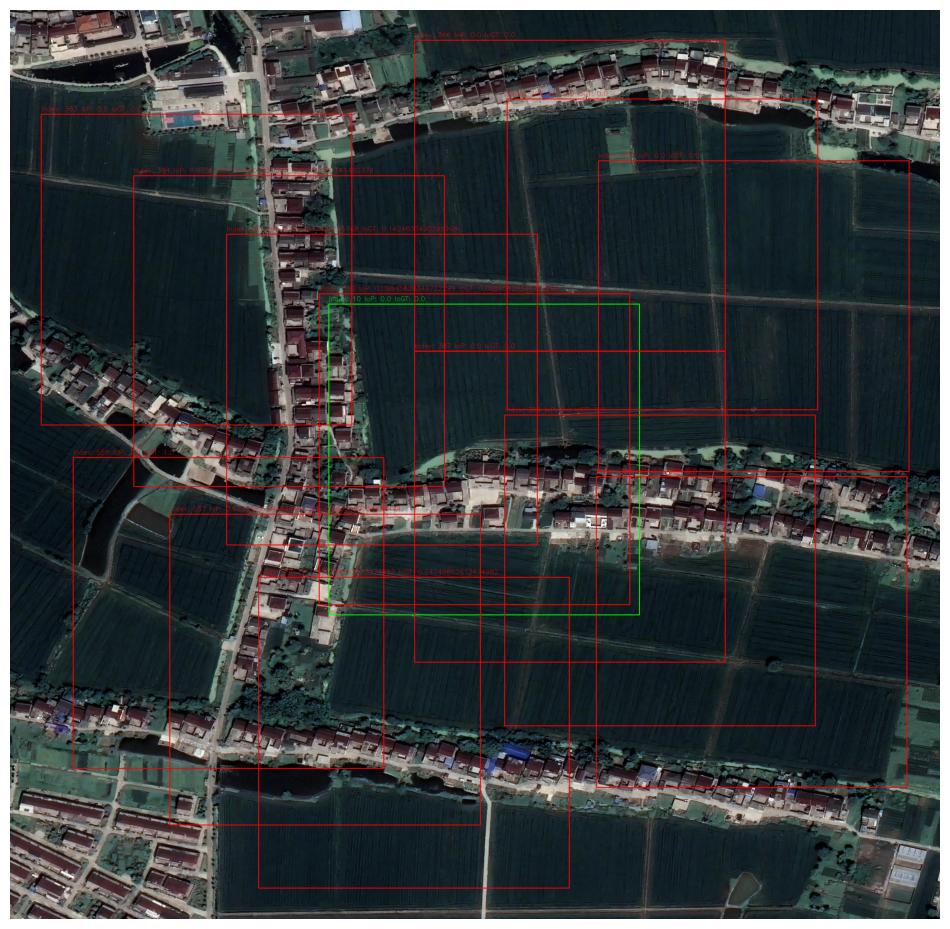

In [4]:

config = PipelineConfig()
config.DATAFRAMES_ROOT.mkdir(parents=True, exist_ok=True)

DATA_CONFIG = [
    {
        "set_type": "train",
        "region_name": "Taizhou-1",
        "uav_visloc_id": "03",
        "map_filename": "satellite03.tif",
    }
]

target_config = DATA_CONFIG[0]


try:
    DATA_CSV_PATH = '/home/user/PycharmProjects/drone-loc-no-gps/Dataframes/one_to_one/Taizhou-1.csv'
    sat_map_object = quick_load_map_satellite(config, target_config)
    analyser = Analyse(csv_path=DATA_CSV_PATH, satellite_map=sat_map_object)
    
    analyser.load_map()
    
    plt.figure(figsize=(12, 12)) 
    
    #Filter = select interesting things 
    place_id_counts = analyser.df["place_id"].value_counts()
    most_frequent_place_id = place_id_counts.idxmax()
    count = place_id_counts.max()
    filtered_df = analyser.df[analyser.df["place_id"] == most_frequent_place_id]
    # f = filtered_df.iloc[1].to_frame()
    # f1 = f.T
    # ~~~~
    analyser.draw_boxes(filtered_df)
    
    plt.axis('off') 
    plt.show()
    
except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

In [5]:
import cv2
input_path = '/home/user/PycharmProjects/datasets/UAV_VisLoc_dataset/03/drone/03_0277.JPG'
crop_scale=0.8
target_width_size=224,
target_height_size=224

img = cv2.imread(input_path)
height, width, channels = img.shape
print(f"w: {width} h:{height}")
shorter_side = min(width, height)
crop_size = shorter_side * crop_scale
print(f"crop: {crop_size}")
left = (width - crop_size) / 2
top = (height - crop_size) / 2
right = (width + crop_size) / 2
bottom = (height + crop_size) / 2
cropped_img = img[int(top) : int(bottom), int(left) : int(right)]
resized_img = cv2.resize(
    cropped_img,
    dsize=(target_width_size, target_height_size),
    interpolation=cv2.INTER_AREA,
)

w: 3976 h:2652
crop: 2121.6


error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
